# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제 과제

# Logistic Regression

분류를 위한 머신러닝 알고리즘의 종류는 매우 다양하며 이후에 다룰 의사결정나무, SVM, Ensemble 모두 분류 예측이 가능한 머신러닝 알고리즘들 이다.

이번 장에서는 매우 단순하면서도 강력한 분류 알고리즘인 Logistic Regression에 대하여 공부를 진행할 예정이다.

Logistic Regression은 기존의 선형 모델들과 달리 함수로 S자 형태를 보이는 시그모이드 함수를 활용하여 0, 1의 확률 값을 출력으로 하여 값을 분류할 수 있다.

시그모이드 함수는 아래와 같다.

## $p = \frac{1}{1 + e^{-x}}$

Logistic Regression의 학습 방법은 선형 회귀에서도 나왔던 경사하강법을 통해서 구현할 수 있다. 경사하강법이란 최소의 손실함수를 구하기 위해서 미분 계수가 0이 되는 지점을 가질 때까지 기울기를 통해서 파라미터를 수정하는 방식이다.

경사하강법은 딥러닝을 공부하기 위해서는 필수적으로 알아야하는 개념이기 때문에 이번에 경사하강법에 대해서 공부한다면 정말 많은 도움이 될 것이다

로지스틱 함수의 손실 함수는 아래와 같은 식을 통해서 구할 수 있다.

## $l(p) = - \Sigma(y\log p(X_{}) + (1 - y) \log(1 - p(X))) $

손실 함수를 통해서 구한 값이 최소가 되기 위해서는 손실 함수를 기반으로 각각의 파라미터를 기준으로 편미분을 진행하면 기울기를 구할 수 있고 구한 기울기와 학습률을 곱하여 가중치를 업데이트해 가면서 최소의 손실함수를 갖는 최적의 파라미터를 찾을 수 있다.

이제 경사하강법을 통해서 학습을 하는 Logistic Regression을 직접 구현하고 사이킷런의 Logistic Regression과 비교를 해보겠다.

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
import numpy as np

# LogisticRegression을 경사하강법을 통하여 구현
class MyLogisticRegression():
    def __init__(self, learning_rate = 0.01, threshold = 0.01, max_iterations = 1000, verbose=False):
        self._learning_rate = learning_rate # 학습률
        self._threshold = threshold # 임계치
        self._max_iterations = max_iterations # 최대 반복 횟수
        self._verbose = verbose # 학습 내용 출력 여부

    # 학습에 사용할 시그모이드 함수 구현
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    # 학습에 사용할 손실 함수 구현 (크로스 엔트로피)
    def loss_func(self, x, y):
        # 값이 무한으로 커지는 것을 방지
        delta = 1e-8

        z = np.dot(x, self._W) + self._b
        y_hat = self.sigmoid(z)
        val = -np.sum(y * np.log(y_hat + delta) + (1 - y) * np.log((1 - y_hat) + delta))

        return val

    # 기울기를 구하는 함수
    def numerical_derivative(self, f, x):
        delta_x = 1e-4  # 0.0001
        grad = np.zeros_like(x)
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

        while not it.finished:
            idx = it.multi_index
            tmp_val = x[idx]
            x[idx] = float(tmp_val) + delta_x
            fx1 = f(x)  # f(x+delta_x)

            x[idx] = tmp_val - delta_x
            fx2 = f(x)  # f(x-delta_x)
            grad[idx] = (fx1 - fx2) / (2 * delta_x)

            x[idx] = tmp_val
            it.iternext()

        return grad

    # 학습
    def fit(self, X_data, y_data):
        self._W = np.random.rand(X_data.shape[1], 1)
        self._b = np.random.rand(1)

        # 미분을 위한 손실 함수 정의
        f = lambda x : self.loss_func(X_data, y_data)

        # 경사하강법을 통한 가중치 업데이트
        for step in range(self._max_iterations):
            self._W -= self._learning_rate * self.numerical_derivative(f, self._W)
            self._b -= self._learning_rate * self.numerical_derivative(f, self._b)

            if (step % 100 == 0) and self._verbose:
                print("step = ", step, "error value = ", self.loss_func(X_data, y_data), "W = ", self._W, ", b = ", self._b)

            if self.loss_func(X_data, y_data) < self._threshold:
                print(f"지정 threshold : {self._threshold} 보다 작은 값 조기 중단 - {step}회 반복")
                break

    # 예측
    def predict(self, x):
        z = np.dot(x, self._W) + self._b
        y_hat = self.sigmoid(z)
        result = np.where(y_hat <= 0.5, 0, 1)

        return result.reshape(-1)

    # coef 출력
    def get_coef(self):
        return self._W.reshape(1, -1)

    # intercept 출력
    def get_intercept(self):
        return self._b

X = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(-1,2)
y = np.array([0, 0, 1, 1, 1]).reshape(5, 1)

lg = MyLogisticRegression(threshold = 0.001)
lg.fit(X, y)
lg_pred = lg.predict(X)
lg_intercept = lg.get_intercept()
lg_coef = lg.get_coef()
print(f'lg_pred : {lg_pred}, lg_intercept : {lg_intercept}, lr_coef: {lg_coef}')

lg_pred : [0 0 1 1 1], lg_intercept : [-2.0396406], lr_coef: [[ 2.63494616 -1.87389104]]


In [ ]:
from sklearn.linear_model import LogisticRegression

s_lg = LogisticRegression()
s_lg.fit(X, y)
s_lg_pred = s_lg.predict(X)
s_lg_intercept = s_lg.intercept_
s_lg_coef = s_lg.coef_

print(f's_lg_pred : {s_lg_pred}, s_lg_intercept : {s_lg_intercept}, s_lg_coef: {s_lg_coef}')

s_lg_pred : [0 0 1 1 1], s_lg_intercept : [-9.04113294], s_lg_coef: [[0.502296   0.50229978]]


사이킷런의 Logistic Regression과 직접 구현한 Logistic Regression 사이에 성능에 큰차이는 없는 것으로 보인다. 하지만 가중치와 절편의 경우에는 값이 크게 차이 나는 것으로 판단되는데 이는 학습을 더 많이 한다면 손실함수가 계속 감소하여 최적의 파라미터를 찾을 수 있을 것이다.

# 분류 평가 지표

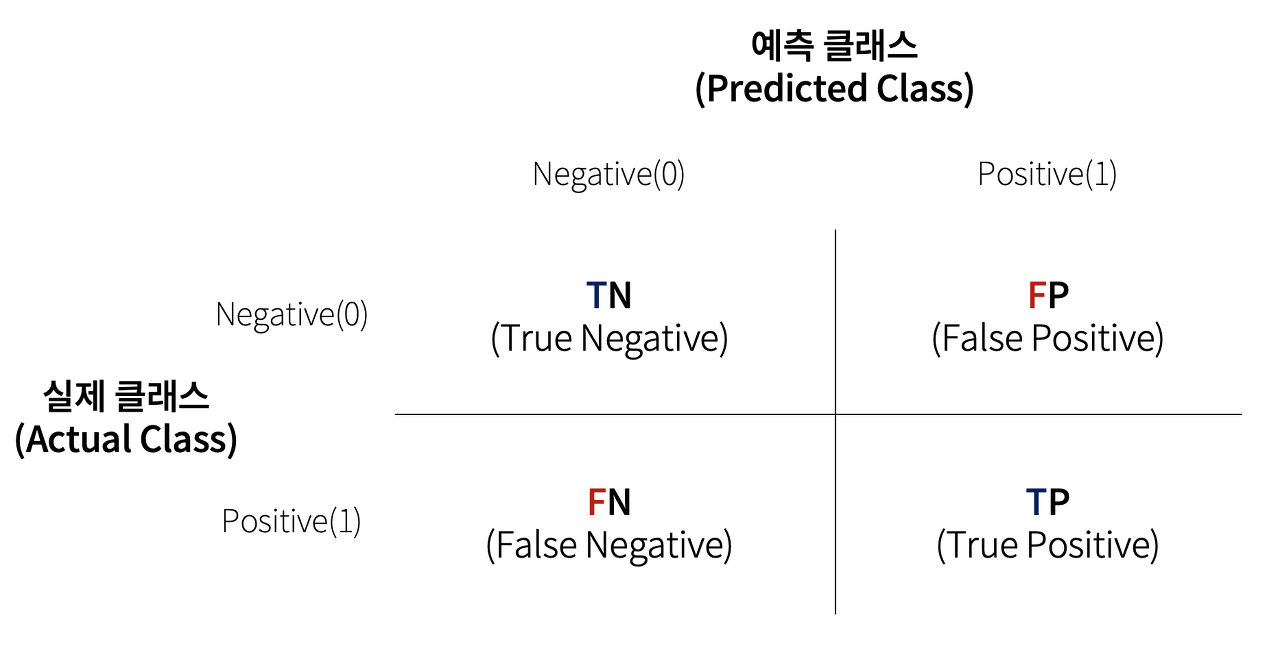

In [ ]:
from IPython.display import Image
Image('https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FEojHI%2FbtqBuwXbsUN%2F1Tt2KW49Zp8ZM7tpBWHUcK%2Fimg.png')

분류 모델의 성능 평가 지표의 경우 위의 **Confusion Matrix**를 기반으로 만들 수 있다.

TN -> 실제 값과 모델이 예측한 값 모두 0인 경우 (부정의 값을 제대로 부정으로 예측)

TP -> 실제 값과 모델이 예측한 값 모두 1인 경우 (긍정의 값을 제대로 긍정으로 예측)

FP -> 실제 값은 0이지만 모델이 예측한 값이 1인 경우 (부정의 값을 긍정으로 예측)

FN -> 실제 값은 1이지만 모델이 예측한 값이 0인 경우 (긍정의 값을 부정으로 예측)

### Accuracy = $ \frac{TP + TN}{TP + FN + FP + TN}$

### Precision = $ \frac{TP}{TP + FP}$

### Recall = $ \frac{TP}{TP + FN}$

### F1_Score = $ 2 * \frac{Precision * Recall}{Precision + Recall}$

### FPR(1 - 특이성) = $ \frac{FP}{FP + TN} $ or $ 1 - TNR == 1 - \frac{TN}{FP + TN} $

### TNR(특이성) = $ \frac{TN}{FP + TN} $

### TPR(민감도 == 재현율) = $ \frac{TP}{TP + FN} $

#### ROC curve의 경우 FPR이 변할 때 RPT이 어떻게 변화하는 지를 나타낸 곡선이다.

#### ROC curve의 넓이를 구한 값이 AUC Scroe이다.

이렇게 다양한 성능 평가 지표가 존재하는 이유는 예를 들어 0이라는 라벨이 99개를 차지하고 1이라는 라벨이 전체 데이터에서 1개를 차지한다면 모델이 모든 값을 0으로 예측해도 99%라는 높은 정확도를 가지게 되다. 하지만 이러한 경우 실제 모델이 값을 제대로 예측을 했다고 볼 수 없기 때문에 이러한 상황에서 모델의 성능을 제대로 예측하고자 다양한 성능 평가지표가 존재하는 것이다. 위와 같은 라벨이 불균형 한 데이터의 경우 분석자의 목표에 알맞게 Precision, Recall,  F1_Score, AUC Scroe 등의 지표를 활용하여 모델의 성능을 예측해야 할 것이다.

# 분류 실습

이제 비식별화 된 개인정보을 가지고 신용카드 사용 내역이 사기인지 진짜 인지를 판단하는 Logistic Regression 모델을 만들 예정이다. 이러한 경우에 어떠한 성능 지표를 바탕으로 모델을 평가해야 하지를 생각하며 실습에 들어가야 할 것이다.

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- https://www.youtube.com/watch?v=3ELMIbGTIDs
- https://www.youtube.com/watch?v=nhzljkpjjFk